In [51]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sys
import os
import os.path

import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc

%matplotlib inline

## BIASED

In [15]:
df = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/terrorsave.csv')
df = df.select_dtypes(include = ['number'])
df = df.fillna(0)
df = df.drop(['Unnamed: 0','Unnamed: 0.1', ], axis = 1)

X,y = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis=1),df['targetoneone']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 42)

est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
est.score(X_test, y_test)

0.99217336007435308

In [17]:
sorted(zip(X.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

[('current_year_count', 0.14327795368479007),
 ('difftwo', 0.10603508147162095),
 ('countone', 0.099952415914172449),
 ('diffone', 0.087977624834012016),
 ('counttwo', 0.077222363361933027),
 ('countfour', 0.075353150604098709),
 ('countthree', 0.063961107043514431),
 ('count_year_max', 0.062270053787009116),
 ('reset_index', 0.051372302657122552),
 ('eventid', 0.025062559887714279),
 ('iyear', 0.023163696030024734),
 ('ingroup', 0.021507395872260953),
 ('latitude', 0.018331396206096501),
 ('perpo_new', 0.015713907773074135),
 ('perpo', 0.014313519180624717),
 ('avgtempunc', 0.012461171046966653),
 ('country', 0.012252183712985925),
 ('longitude', 0.011952989835032889),
 ('region', 0.011258556192148616),
 ('avgtemp', 0.0087537258453701857),
 ('current_month_count', 0.0058000821005041682),
 ('natlty1', 0.0042401169340174532),
 ('targettwo', 0.0039183784041077942),
 ('natlty2', 0.0037963615008662342),
 ('weapsubtype1', 0.0033077774270837061),
 ('targtype1', 0.0031609355444517998),
 ('mon

## STILL BIASED

In [53]:
df = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/terrorsavechange.csv')

df = df.drop(['extended', 'crit1', 'success','attacktype3','natlty3', 'ingroup3','guncertain2', 'guncertain3',
 'claimed','claimmode', 'claim3','claimmode3', 'weaptype2', 'weapsubtype2','nkillter', 'nwoundus', 'nwoundte','nhostkidus',
 'nhours', 'ransomamtus', 'ransompaidus','INT_IDEO', 'INT_MISC', 'INT_ANY', 'ingroup', 'latitude', 'perpo_new', 'perpo', 
 'country', 'longitude', 'region', 'current_month_count', 'natlty1', 'targettwo', 'natlty2', 'weapsubtype1', 
 'targtype1', 'month_alt', 'imonth', 'nwound', 'targetone', 'compclaim', 'INT_LOG', 
 'nkillus', 'propvalue', 'nkill','ransompaid','nperpcap', 'targsubtype1', 'ransomamt', 'targtype3', 'suicide',
 'weapsubtype3','weaptype1', 'vicinity','ransom', 'specificity', 'ndays', 'targsubtype2', 'attacktype1', 'weapsubtype4', 
 'weaptype4','targsubtype3', 'claim2', 'nperps', 'alternative','nhostkid', 'targtype2', 'ingroup2', 'nreleased', 
 'weaptype3', 'crit2', 'multiple',  'claimmode2',  'crit3',  'iday',  'propextent', 'doubtterr', 'ishostkid', 
  'guncertain1',  'hostkidoutcome',  'property', 'attacktype2','countthree','counttwo', 'Unnamed: 0', 'reset_index', 'Unnamed: 0.1',
 'iyear', 
 'eventid','current_year_count', 
 'diffone', 
 'countone', 
 'count_year_max', 
 'difftwo', 'countthree'], axis = 1)

X,y = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis=1),df['targettwotwo']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 42)

In [62]:
est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
est.score(X_test, y_test)

0.86821895025191997

Model: GBT
AUC: 0.915808296501



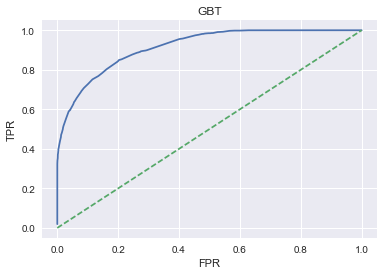

In [63]:
y_score = est.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [64]:
sorted(zip(X_train.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

[('countfour', 1.0)]

In [147]:
logr = LogisticRegression(penalty =  'l2', solver = 'liblinear')
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.84038546201633813

In [160]:
df1.targettwotwo.value_counts()

0.0    57259
1.0    10882
Name: targettwotwo, dtype: int64

In [291]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
#     return (recallvec, precisionvec, threshvec)

def log_lik_binary(truthvec, probvec):
    return np.sum((np.log(probvec)*truthvec) + (np.log(1-probvec)*(1-truthvec)))

/Users/toni/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


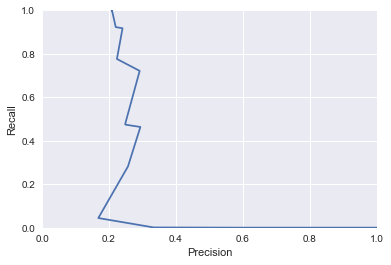

In [292]:
pr_curve(y_test, y_score)

In [151]:
log_lik_binary(y_test,y_score)

-928.5558242414232

## LESS BIASED

In [203]:
df2 = df.drop(['reset_index', 'eventid','count_year_max'], axis = 1)

In [212]:
X_train = df2.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis = 1)[df2.iyear < 2010]
X_test = df2.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis = 1)[df2.iyear >= 2010]
y_train = df2[df2.iyear < 2010]['targettwotwo']
y_test =  df2[df2.iyear >= 2010]['targettwotwo']

In [214]:
est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
est.score(X_test, y_test)

0.79064480239926471

In [216]:
sorted(zip(X_train.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

[('current_year_count', 0.13506991200203564),
 ('difftwo', 0.12815075707111759),
 ('countone', 0.10536749228210773),
 ('iyear', 0.10224744877259782),
 ('counttwo', 0.084108391236460078),
 ('diffone', 0.071805769936416727),
 ('countthree', 0.070595308055742795),
 ('countfour', 0.063244613763253993),
 ('ingroup', 0.048435472539542106),
 ('region', 0.02944006031768889),
 ('longitude', 0.021108192346263443),
 ('perpo', 0.020677843958274301),
 ('perpo_new', 0.018051588867852488),
 ('country', 0.016477163782340043),
 ('latitude', 0.015860753614320967),
 ('avgtempunc', 0.011928223854976995),
 ('avgtemp', 0.010001289867797905),
 ('natlty1', 0.0055078180794238792),
 ('INT_LOG', 0.0046261608444704812),
 ('targettwo', 0.0043427126161647107),
 ('nkill', 0.0029896780417838597),
 ('current_month_count', 0.0026157135897348196),
 ('ndays', 0.0025698484688409817),
 ('targetone', 0.0022386352627281254),
 ('targtype2', 0.0021533184828315451),
 ('iday', 0.0018473787916805822),
 ('nperps', 0.00165397974414

Model: GBT
AUC: 0.652017714928



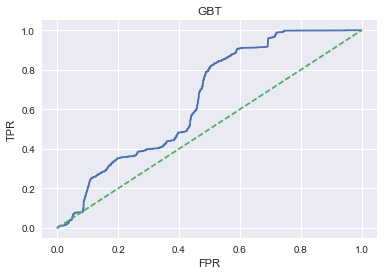

In [217]:
y_score = est.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

/Users/toni/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


(array([  1.00000000e+00,   4.01860465e-01,   3.23953488e-01,
          2.82325581e-01,   1.93488372e-01,   1.51162791e-01,
          7.90697674e-02,   7.72093023e-02,   7.44186047e-02,
          7.20930233e-02,   6.58139535e-02,   5.18604651e-02,
          3.83720930e-02,   2.81395349e-02,   2.51162791e-02,
          2.20930233e-02,   1.93023256e-02,   1.69767442e-02,
          1.51162791e-02,   1.32558140e-02,   1.23255814e-02,
          1.11627907e-02,   1.11627907e-02,   1.11627907e-02,
          1.00000000e-02,   9.53488372e-03,   9.30232558e-03,
          8.37209302e-03,   7.67441860e-03,   7.44186047e-03,
          6.97674419e-03,   6.51162791e-03,   3.72093023e-03,
          3.72093023e-03,   2.79069767e-03,   2.79069767e-03,
          2.79069767e-03,   2.79069767e-03,   2.79069767e-03,
          2.55813953e-03,   2.55813953e-03,   2.32558140e-03,
          2.32558140e-03,   2.32558140e-03,   2.32558140e-03,
          2.09302326e-03,   1.62790698e-03,   1.39534884e-03,
        

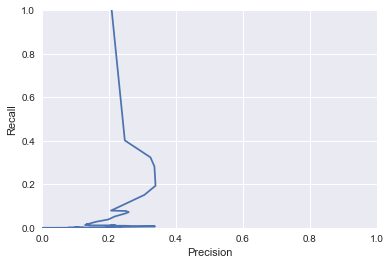

In [218]:
pr_curve(y_test, y_score)

In [219]:
logr = LogisticRegression(penalty =  'l2', solver = 'liblinear')
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.79199922604363182

In [220]:
logr.coef_

array([[ -1.28354849e-05,  -4.12950094e-08,  -9.83672900e-08,
         -9.80014703e-07,  -3.83253493e-08,  -1.53183327e-07,
         -3.41623380e-07,  -1.00938168e-08,  -4.53277045e-10,
         -6.36687996e-09,  -5.55999945e-09,  -2.78256119e-09,
         -1.28299336e-09,  -9.64756410e-10,  -1.15961875e-10,
         -1.99738948e-08,  -4.95792841e-10,  -5.06771737e-08,
         -2.77877328e-07,  -8.48012386e-07,  -2.04349841e-09,
         -1.02892150e-08,  -3.19868382e-08,  -3.25195997e-10,
         -1.71905291e-09,  -1.56155539e-05,  -6.23460654e-07,
         -9.62099948e-10,  -8.27064376e-08,  -8.12264777e-09,
         -2.23177305e-11,  -1.78819670e-10,  -2.81839912e-09,
         -4.13291036e-08,  -5.41595882e-08,  -3.83273254e-10,
         -6.30800901e-10,  -3.65484011e-11,  -3.81875445e-11,
         -1.73423048e-08,  -6.48554516e-10,  -1.77146679e-08,
         -7.38679699e-09,  -7.11590543e-09,  -1.39040085e-06,
         -4.52870277e-10,  -4.18452409e-09,  -1.21861114e-08,
        

## LESS BIASED & NO TIME SHIFTED TEMP

In [290]:
df = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/terrorsavechange.csv')

In [237]:
X_train = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis = 1)[(df.iyear < 2010) & (df.iyear > 1990)]
X_test = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone'], axis = 1)[df.iyear >= 2010]
y_train = df[(df.iyear < 2010) & (df.iyear > 1990)]['targettwotwo']
y_test =  df[df.iyear >= 2010]['targettwotwo']

In [286]:
est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
est.score(X_test, y_test)

0.79180573695157941

In [288]:
y_predict = est.predict(X_test)
precision_recall_fscore_support(y_test,y_predict, average='micro')

(0.79180573695157941, 0.79180573695157941, 0.79180573695157941, None)

In [239]:
sorted(zip(X_train.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

[('current_year_count', 0.17188392070146558),
 ('difftwo', 0.10014904306714779),
 ('countthree', 0.085218752789735855),
 ('countone', 0.071148689948199423),
 ('countfour', 0.058931919370236438),
 ('iyear', 0.049802787961916131),
 ('diffone', 0.045865395091304939),
 ('counttwo', 0.045210929409961007),
 ('longitude', 0.044365812776273029),
 ('ingroup', 0.036503537358663699),
 ('region', 0.035869010181990603),
 ('avgtempunc', 0.034304142768142067),
 ('avgtemp', 0.033978498319997656),
 ('latitude', 0.030447740787186022),
 ('perpo', 0.024354446100415802),
 ('perpo_new', 0.021172469785356335),
 ('iday', 0.013903274978952555),
 ('natlty1', 0.011909486251932954),
 ('country', 0.010330919418813622),
 ('current_month_count', 0.008400523489893251),
 ('alternative', 0.0050730648219045379),
 ('nkill', 0.0048067992796693932),
 ('nwound', 0.0046179387141137588),
 ('targsubtype3', 0.004533299857388067),
 ('nhostkid', 0.0038516488814341354),
 ('propvalue', 0.0038025607631775159),
 ('INT_LOG', 0.0034623

Model: GBT
AUC: 0.567671407408



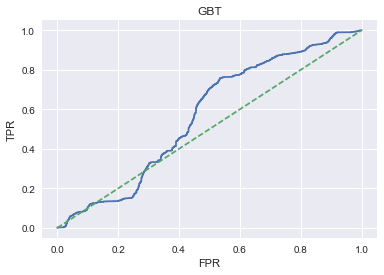

In [240]:
y_score = est.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

(array([  1.00000000e+00,   6.90697674e-02,   3.97674419e-02,
          3.02325581e-02,   1.48837209e-02,   6.27906977e-03,
          3.02325581e-03,   3.02325581e-03,   2.79069767e-03,
          2.55813953e-03,   2.55813953e-03,   2.55813953e-03,
          2.55813953e-03,   2.55813953e-03,   2.32558140e-03,
          2.32558140e-03,   2.32558140e-03,   2.32558140e-03,
          2.32558140e-03,   2.32558140e-03,   2.32558140e-03,
          2.09302326e-03,   2.09302326e-03,   2.09302326e-03,
          2.09302326e-03,   2.09302326e-03,   2.09302326e-03,
          2.09302326e-03,   1.86046512e-03,   1.86046512e-03,
          1.86046512e-03,   1.39534884e-03,   1.39534884e-03,
          1.16279070e-03,   1.16279070e-03,   1.16279070e-03,
          6.97674419e-04,   4.65116279e-04,   2.32558140e-04,
          2.32558140e-04]),
 array([ 0.20800077,  0.25169492,  0.22559367,  0.19548872,  0.11962617,
         0.06221198,  0.03903904,  0.06951872,  0.07843137,  0.07746479,
         0.09166667,

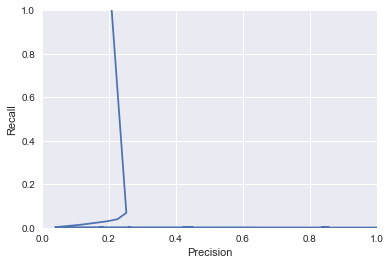

In [241]:
pr_curve(y_test, y_score)

In [242]:
logr = LogisticRegression(penalty =  'l2', solver = 'liblinear')
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.79209597058965797

In [271]:
sorted(zip(X_train.columns, abs(logr.coef_[0])), key=lambda x: -x[1])

[('iyear', 0.00076016046037702953),
 ('current_year_count', 5.7828060223902616e-05),
 ('country', 5.6871313879037356e-05),
 ('perpo_new', 5.5917637534652776e-05),
 ('perpo', 5.5916016473445049e-05),
 ('natlty1', 5.0627063937608044e-05),
 ('countone', 4.4601221299503538e-05),
 ('counttwo', 4.2077229543595805e-05),
 ('countthree', 3.9059375031889319e-05),
 ('countfour', 3.7049766104824731e-05),
 ('longitude', 2.001027484937381e-05),
 ('ingroup', 1.8969625671837193e-05),
 ('targsubtype1', 1.6762429874421619e-05),
 ('difftwo', 1.3823901510327531e-05),
 ('diffone', 1.0595918871571548e-05),
 ('latitude', 9.075678989742505e-06),
 ('current_month_count', 7.9586901474136025e-06),
 ('avgtemp', 7.5215059244373559e-06),
 ('iday', 5.7908547950669786e-06),
 ('nperps', 5.6325196635753197e-06),
 ('propvalue', 4.0767659345410431e-06),
 ('weapsubtype1', 3.1562357001873962e-06),
 ('ingroup2', 3.1005114648198354e-06),
 ('targtype1', 3.0786207713657223e-06),
 ('region', 2.5333709489925149e-06),
 ('weaptype

Model: GBT
AUC: 0.62116499228



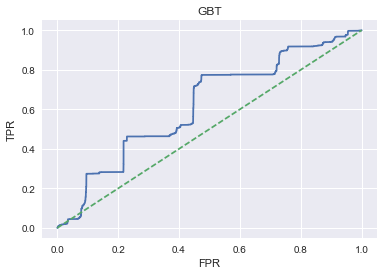

In [272]:
y_score = logr.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [285]:
y_predict = logr.predict(X_test)
precision_recall_fscore_support(y_test,y_predict, average='micro')

(0.79209597058965797, 0.79209597058965797, 0.79209597058965797, None)

/Users/toni/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


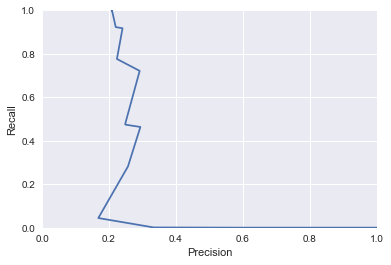

In [293]:
pr_curve(y_test, y_score)

In [273]:
svcmodel = SVC()

In [274]:
svcmodel.fit(X_train, y_train)
svcmodel.score(X_test,y_test)

0.79199922604363182

In [289]:
y_predict = svcmodel.predict(X_test)
precision_recall_fscore_support(y_test,y_predict, average='micro')

(0.79199922604363182, 0.79199922604363182, 0.79199922604363182, None)

## UNBIASED WITHOUT TEMPERATURE DATA

In [296]:
df = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/terrorsavechange8.csv')

In [300]:
X_train = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone','targetoneone_unbias','targetonetwo_unbias','targettwotwo_unbias','targettwoone_unbias'], axis = 1)[(df.iyear < 2010) & (df.iyear > 1990)]
X_test = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone','targetoneone_unbias','targetonetwo_unbias','targettwotwo_unbias','targettwoone_unbias'], axis = 1)[df.iyear >= 2010]
y_train = df[(df.iyear < 2010) & (df.iyear > 1990)]['targettwotwo']
y_test =  df[df3.iyear >= 2010]['targettwotwo']

In [301]:
est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
print( 'gbc = {0}'.format(est.score(X_test, y_test)))

y_predict = est.predict(X_test)
print (precision_recall_fscore_support(y_test,y_predict, average='micro'))

sorted(zip(X_train.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

gbc = 0.7180380206065883
(0.71803802060658828, 0.71803802060658828, 0.71803802060658828, None)


[('current_year_count', 0.11769541762210782),
 ('difftwo', 0.11688608327986426),
 ('countthree', 0.09814652041602695),
 ('countfour', 0.091654821763433619),
 ('countone', 0.080773925502455574),
 ('count_year_max_unbias', 0.070102087571732932),
 ('diffone', 0.066532061911263304),
 ('count_year_max', 0.065653687563795554),
 ('counttwo', 0.042661458557182126),
 ('ingroup', 0.025307336315545343),
 ('eventid', 0.01880725067168763),
 ('reset_index', 0.018674769167504799),
 ('longitude', 0.016715622931300331),
 ('country', 0.016258470716407101),
 ('Unnamed: 0.1', 0.016147627214617981),
 ('perpo', 0.016036628613804518),
 ('iyear', 0.015663341677913601),
 ('Unnamed: 0', 0.015657755970056152),
 ('perpo_new', 0.011286688597055739),
 ('latitude', 0.011143049369586622),
 ('region', 0.010839642198935278),
 ('natlty1', 0.0060873213625395831),
 ('INT_LOG', 0.0051717966365971459),
 ('nperpcap', 0.0048908443324601663),
 ('ingroup3', 0.0039038699956291038),
 ('nhours', 0.0034775705002454437),
 ('targetwo

Model: GBT
AUC: 0.67606411128



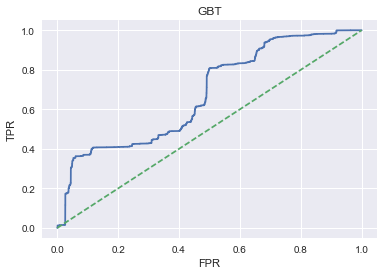

In [302]:
y_score = est.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

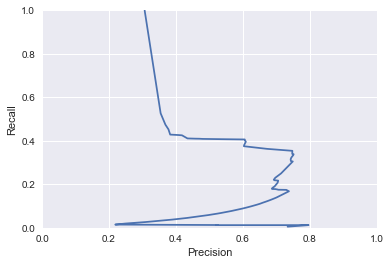

In [303]:
pr_curve(y_test, y_score)

In [306]:
logr = LogisticRegression(penalty =  'l2', solver = 'liblinear')
logr.fit(X_train, y_train)
print ('logr = {0}'.format(logr.score(X_test, y_test)))

y_predict = logr.predict(X_test)
print(precision_recall_fscore_support(y_test,y_predict, average='micro'))

sorted(zip(X_train.columns, abs(logr.coef_[0])), key=lambda x: -x[1])

logr = 0.6936583950079814
(0.69365839500798143, 0.69365839500798143, 0.69365839500798143, None)


[('eventid', 8.4245615263937742e-12),
 ('propvalue', 3.3295955238923179e-17),
 ('ransomamt', 2.2177070065363441e-18),
 ('Unnamed: 0', 1.4199976195878768e-18),
 ('Unnamed: 0.1', 1.2881736143829131e-18),
 ('reset_index', 1.2881736143829131e-18),
 ('ransomamtus', 9.6976880588098741e-19),
 ('ransompaid', 1.3730268552717281e-19),
 ('iyear', 8.4243148958045885e-20),
 ('ingroup', 2.4109359584280297e-20),
 ('ingroup2', 1.9419923885773454e-20),
 ('count_year_max', 1.3304542471969821e-20),
 ('count_year_max_unbias', 1.2207641204165488e-20),
 ('country', 1.1025946405994345e-20),
 ('perpo', 1.0823463836192962e-20),
 ('perpo_new', 1.0814285957774354e-20),
 ('natlty1', 8.1598008917778073e-21),
 ('current_year_count', 7.9682511907506862e-21),
 ('countfour', 6.8097538134070597e-21),
 ('countthree', 6.2535914060754565e-21),
 ('countone', 6.1622985477154384e-21),
 ('counttwo', 5.7811967366984863e-21),
 ('ingroup3', 3.5898454275556567e-21),
 ('targsubtype1', 1.9623079975139546e-21),
 ('difftwo', 1.763955

Model: GBT
AUC: 0.860534820044



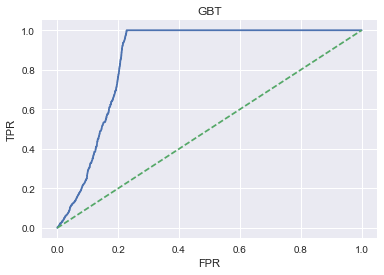

In [307]:
y_score = logr.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [309]:
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
print('svcmodel = {0}'.format(svcmodel.score(X_test,y_test)))

y_predict = svcmodel.predict(X_test)
print(precision_recall_fscore_support(y_test,y_predict, average='micro'))

svcmodel = 0.6936583950079814
(0.69365839500798143, 0.69365839500798143, 0.69365839500798143, None)


## UNBIASED WITH TEMPERATURE DATA

In [4]:
df = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/terrorsavechange20.csv')

In [22]:
X_train = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone','targetoneone_unbias','targetonetwo_unbias','targettwotwo_unbias','targettwoone_unbias','targetoneone_unbias_year','targetonetwo_unbias_year','targettwotwo_unbias_year','targettwoone_unbias_year'], axis = 1)[(df.iyear < 2010) & (df.iyear > 1990)]
X_test = df.drop(['targetoneone','targetonetwo','targettwotwo','targettwoone','targetoneone_unbias','targetonetwo_unbias','targettwotwo_unbias','targettwoone_unbias'], axis = 1)[df.iyear >= 2010]
y_train = df[(df.iyear < 2010) & (df.iyear > 1990)]['targettwotwo_unbias_year']
y_test =  df[df.iyear >= 2010]['targetoneone_unbias']

In [24]:
y_train.value_counts()

0.0    20146
Name: targettwotwo_unbias_year, dtype: int64

In [ ]:
est = GradientBoostingClassifier(n_estimators=500).fit(X_train, y_train)
print( 'gbc = {0}'.format(est.score(X_test, y_test)))

y_predict = est.predict(X_test)
print (precision_recall_fscore_support(y_test,y_predict, average='micro'))

sorted(zip(X_train.columns,abs(est.feature_importances_)), key=lambda x: -x[1])

In [ ]:
y_score = est.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [ ]:
pr_curve(y_test, y_score)

In [ ]:
logr = LogisticRegression(penalty =  'l2', solver = 'liblinear')
logr.fit(X_train, y_train)
print ('logr = {0}'.format(logr.score(X_test, y_test)))

y_predict = logr.predict(X_test)
print(precision_recall_fscore_support(y_test,y_predict, average='micro'))

sorted(zip(X_train.columns, abs(logr.coef_[0])), key=lambda x: -x[1])

In [ ]:
y_score = logr.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [ ]:
pr_curve(y_test, y_score)

In [ ]:
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
print('svcmodel = {0}'.format(svcmodel.score(X_test,y_test)))

y_predict = svcmodel.predict(X_test)
print(precision_recall_fscore_support(y_test,y_predict, average='micro'))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('knn = {0}'.format(knn.score(X_test,y_test)))

y_predict = knn.predict(X_test)
print(precision_recall_fscore_support(y_test,y_predict, average='micro'))

In [ ]:
y_score = logr.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

print('Model: GBT')
print('AUC: ' + str(roc_auc))
print("")

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GBT')
plt.show()

In [ ]:
pr_curve(y_test, y_score)